**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [37]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, folds=1):
        self.n_neighbors = n_neighbors
        self.folds = folds

    def fit(self, X, y):
        self.X = np.float64(X)  # hello mnist
        self.y = y
        self.classes = np.unique(y)
        return self

    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)

    def predict_proba(self, X):
        hist = np.zeros([X.shape[0], self.classes.shape[0]])
        X = np.array_split(np.float64(X), self.folds)  # hello RAM
        shift = 0
        X_2 = (self.X ** 2).sum(axis=1)
        for (i, x) in enumerate(X):
            x_2 = (x ** 2).sum(axis=1)
            xX = x.dot(self.X.T)
            distance = -2 * xX + X_2 + x_2.reshape(-1, 1)
            neighbors = np.argpartition(distance, self.n_neighbors - 1,
                                        axis=1)[:, :self.n_neighbors]
            class_matrix = self.y[neighbors]
            for row in range(class_matrix.shape[0]):
                unique, counts = np.unique(class_matrix[row],
                                           return_counts=True)
                hist[shift + row, np.int64(unique)] = counts
            shift += x.shape[0]
        return hist / self.n_neighbors

    def score(self, X, y):
        return (self.predict(X) == y).sum() / y.shape[0]


**IRIS**

In [3]:
iris = datasets.load_iris()

Посмотрим на данные

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


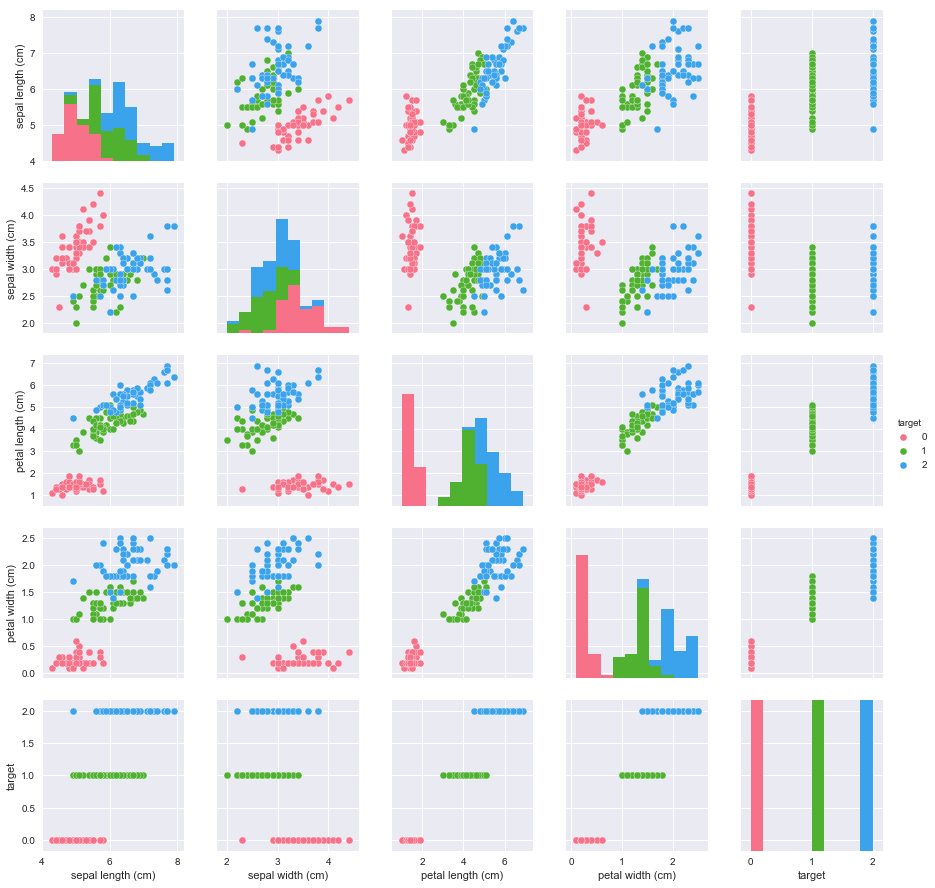

In [4]:
import pandas as pd
from IPython.display import display

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(iris_df.describe())
iris_df['target'] = iris.target
sns.pairplot(iris_df, hue="target", palette="husl")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [8]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [13]:
%timeit clf.fit(X_train, y_train)

1000 loops, best of 3: 310 µs per loop


In [14]:
%timeit my_clf.fit(X_train, y_train)

The slowest run took 24.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.9 µs per loop


In [15]:
%timeit clf.predict(X_test)

1000 loops, best of 3: 462 µs per loop


In [16]:
%timeit my_clf.predict(X_test)

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 433 µs per loop


In [17]:
%timeit clf.predict_proba(X_test)

1000 loops, best of 3: 384 µs per loop


In [18]:
%timeit my_clf.predict_proba(X_test)

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 426 µs per loop


In [19]:
clf.score(X_test, y_test)

1.0

In [20]:
my_clf.score(X_test, y_test)

1.0

Задание 3: в среднем 17 соседей - это оптимально

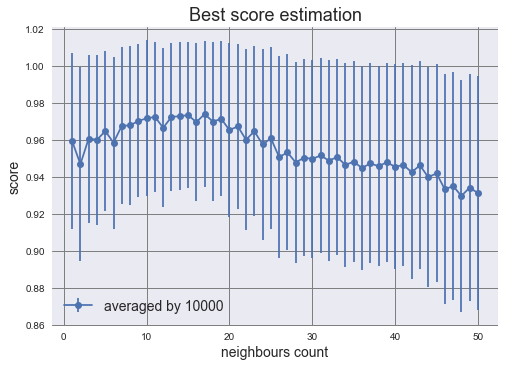

In [21]:
max_neighbors_count = 50
experiments_count = 10000

neighbors = range(1, max_neighbors_count + 1)
score_data = np.zeros((experiments_count, max_neighbors_count))
score_mean = np.zeros(max_neighbors_count)
score_error = np.zeros(max_neighbors_count)

for (i, exp) in enumerate(score_data):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for (j, n) in enumerate(neighbors):
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        score_data[i, j] = my_clf.score(X_test, y_test)

score_mean = np.mean(score_data, axis=0)
score_error = np.std(score_data, axis=0)

fig, ax = plt.subplots()

ax.errorbar(neighbors, score_mean, yerr=score_error, fmt='o-',
            label='averaged by ' + str(experiments_count), capsize=14)

ax.set_xlabel('neighbours count', fontsize=14)
ax.set_ylabel('score', fontsize=14)
ax.set_title('Best score estimation', fontsize=18)
ax.grid(color='tab:grey', linestyle='-', linewidth=1)
ax.legend(fontsize=14)

plt.show()


**MNIST**

In [22]:
mnist = fetch_mldata('MNIST original')

Посмотрим на данные

In [23]:
mnist_df = pd.DataFrame(mnist.data)
display(mnist_df.describe())

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Видны нулевые признаки

In [24]:
without_zero_mnist = mnist_df.loc[:, (mnist_df != 0).any(axis=0)]

Их количество:

In [25]:
mnist_df.shape[1] - without_zero_mnist.shape[1]

65

In [26]:
mnist_df[0].head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: uint8

Признаки имеют тип `uint8`.
Их необходимо приводить к типу с плавающей точкой в методах класса

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [28]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2, folds=700)

In [29]:
%time clf.fit(X_train, y_train)

Wall time: 31 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

Wall time: 304 ms


MyKNeighborsClassifier(folds=700, n_neighbors=2)

In [31]:
%time clf.predict(X_test)

Wall time: 16min 35s


array([ 5.,  9.,  2., ...,  3.,  6.,  9.])

In [32]:
%time my_clf.predict(X_test)

Wall time: 1min 1s


array([5, 9, 2, ..., 3, 6, 9], dtype=int64)

In [33]:
%time clf.predict_proba(X_test)

Wall time: 15min 59s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [34]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 5s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [35]:
clf.score(X_test, y_test)

0.97099999999999997

In [36]:
my_clf.score(X_test, y_test)

0.97099999999999997

Задание 5

In [ ]:
# seaborn - оптимизированная под визуализацию стат. данных надстройка над matplotlib, позволяет наглядно демонстрировать данные, строить 
#           тепловые карты, матрицы корреляций и т.д. (пример для ирисов выше)
#
# matplotlib - модуль для визуализации данных (пример: график поиска оптимального числа соседей)
#
# train_test_split - функция для разбиения входных данных на обучающую и тестовую выборки в случайном порядке, позволяет получить
#                    стратифицированные сплиты, что очень важно для задачи классификации
#
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - используется для простого заполнения новых признаков в модели,
#                                                              набор инкапсулированных преобразований 
#
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для нормализации данных: вычитания среднего значения
#                                                                     выборки и приведения к единичному стандартному отклонению;
#                                                                     это важно, так как одни признаки могут иметь на порядок большие
#                                                                     интервалы распределения, чем другие (например, в таком случае
#                                                                     градиентный спуск будет крайне неэффективен)
#
# ClassifierMixin - интерфейс, который позволяет различным классам в sklearn обнаруживать, что реализуемый класс ведет себя
#                   как классификатор
#
# NeighborsBase - базовый класс для kNN эстиматоров
#
# KNeighborsMixin - интерфейс для поиска k ближайших соседей
#
# SupervisedIntegerMixin - интерфейс для обучения с учителем, реализует метод fit